In [1]:
import numpy as np
import pandas as pd

In [2]:
training_set = pd.read_csv('train_cleaned.csv')
testing_set = pd.read_csv('test_cleaned.csv')
training_set.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1.0,1,0.271174,0.014151,0.1,0,0,1
1,2,1,0.0,0,0.472229,0.139136,0.1,1,0,0
2,3,1,1.0,0,0.321438,0.015469,0.0,0,0,1
3,4,1,0.0,0,0.434531,0.103644,0.1,0,0,1
4,5,0,1.0,1,0.434531,0.015713,0.0,0,0,1


In [3]:
training_targets = training_set['Survived']
training_passengerID = training_set['PassengerId']

testing_passengerID = testing_set['PassengerId']

training_set.drop(['Survived'], axis=1, inplace=True)
for series in (training_set, testing_set):
    series.drop(['PassengerId'], axis=1, inplace=True)


In [4]:
testing_set.head()

,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1,0.452723,0.015282,0.0,0,1,0
1,1.0,0,0.617566,0.013663,0.1,0,0,1
2,0.5,1,0.815377,0.018909,0.0,0,1,0
3,1.0,1,0.353818,0.016908,0.0,0,0,1
4,1.0,0,0.287881,0.023984,0.2,0,0,1


In [5]:
def logistic_regression(features, targets, weights, bias, learning_rate, epochs):
    # defining the number of training examples
    m = features.shape[0]
    # stay in the loop until epochs are finished
    while epochs:
        # the Z part of the sigmoid equation
        linear_func = np.dot(features, weights) + bias
        # the sigmoid equation
        sigmoid_func =  1 / ( 1 + np.exp(-(linear_func)) )
        # calculating current error
        error = sigmoid_func - targets
        # calculating new gradient decent Batch gradient decent method
        delta_w = ( 1 / m ) * np.dot(features.T, error)
        delta_b = ( 1 / m ) * np.sum(error)
        
        tmp_w = weights - ( learning_rate * delta_w )
        tmp_b = bias - ( learning_rate * delta_b )

        weights = tmp_w
        bias = tmp_b

        epochs -= 1

    return ( weights, bias )

In [6]:
initial_weights = np.zeros(training_set.shape[1])
initial_bias = 0
epochs = 10000
learning_rate = 1

In [7]:
(trained_w, trained_b) = logistic_regression(training_set, training_targets, initial_weights, initial_bias, learning_rate, epochs)


In [8]:
trained_w

array([-2.18621803, -2.74754524, -3.05844762,  1.09987017, -2.2032745 ,
        1.15940089,  1.06646382,  0.73855558])

In [9]:
testing_targets = pd.read_csv('test_augmented.csv')
testing_targets = testing_targets['Survived']
testing_targets

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create an instance of the model
log_reg = LogisticRegression()
# Train the model
log_reg.fit(training_set, training_targets)
# Make predictions on the test set
predictions = log_reg.predict(testing_set)
# Calculate the accuracy
accuracy = accuracy_score(testing_targets, predictions)

print(f"Scikit-learn Model Accuracy: {accuracy}")

Scikit-learn Model Accuracy: 0.7727272727272727


In [11]:
my_predections = (1/(1 + np.exp(-(np.dot(testing_set, trained_w)+trained_b))) >= 0.5).astype(int) 

my_accuracy = accuracy_score(testing_targets, my_predections)

print(f"Model Accuarcy: {my_accuracy}")

Model Accuarcy: 0.7703349282296651


In [13]:
import numpy as np

age_range = np.linspace(training_set['Age'].min(), training_set['Age'].max(), 300)
# Create a temporary DataFrame with average values
temp_df = pd.DataFrame(np.mean(training_set, axis=0).values.reshape(1, -1), columns=training_set.columns)
temp_df = temp_df.loc[temp_df.index.repeat(len(age_range))]
temp_df['Age'] = age_range

# Manually calculate the probabilities using your trained parameters
# 1. Calculate the linear part (z)
z = np.dot(temp_df, trained_w) + trained_b

# 2. Apply the sigmoid function
age_probabilities = 1 / (1 + np.exp(-z))

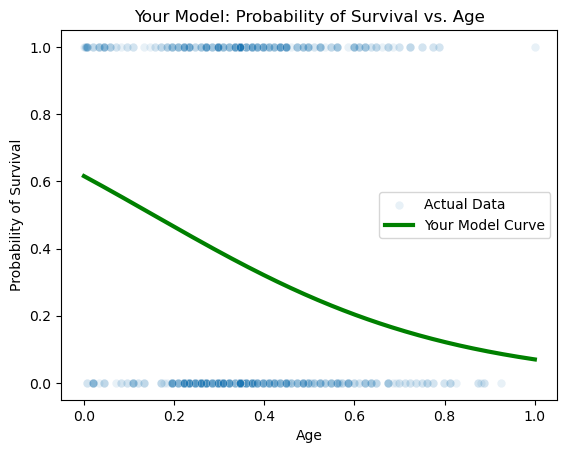

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual data points
sns.scatterplot(x=training_set['Age'], y=training_targets, alpha=0.1, label='Actual Data')

# Plot your model's logistic regression curve
plt.plot(age_range, age_probabilities, color='green', linewidth=3, label='Your Model Curve')

plt.title('Your Model: Probability of Survival vs. Age')
plt.xlabel('Age')
plt.ylabel('Probability of Survival')
plt.legend()
plt.show()